In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random
#import segmentation_models_pytorch as smp

In [68]:
# Constants
SIZE = 256
BATCH_SIZE = 16
EPOCHS = 25
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the image
image_folder_path = '/data1/sprasad/data/train/originalTrain/image'
# Load and preprocess the image
label_folder_path = '/data1/sprasad/autoencoder3/label'

image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]
label_files = [f for f in os.listdir(label_folder_path) if os.path.isfile(os.path.join(label_folder_path, f))]

img_data = []
label_data=[]


In [83]:
import os
import numpy as np
import cv2
import torch

# Constants
SIZE = 256
BATCH_SIZE = 16
EPOCHS = 25
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the images and labels
image_folder_path = '/data1/sprasad/data/train/originalTrain/image'
label_folder_path = '/data1/sprasad/autoencoder3/label'

image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]
label_files = [f for f in os.listdir(label_folder_path) if os.path.isfile(os.path.join(label_folder_path, f))]

# Ensure image files are sorted to match with label files
image_files.sort()
label_files.sort()

img_data = []
label_data = []

for img_file,label_file in zip(image_files,label_files):
    img_path = os.path.join(image_folder_path, img_file)
    label_path = os.path.join(label_folder_path, label_file)

    if os.path.exists(label_path):
        img = cv2.imread(img_path)
        mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        mask = cv2.resize(mask, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

        img_data.append(img)
        label_data.append(mask)
    else:
        print(f"Label not found for {img_file}")

# Check if the number of images matches the number of labels
if len(img_data) != len(label_data):
    raise ValueError("The number of images does not match the number of labels")

# Convert lists to numpy arrays
img_array = np.array(img_data).astype('float32') / 255.0
label_array = np.array(label_data).astype('int64')  # Keep labels as integers

# Convert numpy arrays to PyTorch tensors
img_tensor = torch.from_numpy(img_array).permute(0, 3, 1, 2)  # Change to (B, C, H, W) format
label_tensor = torch.from_numpy(label_array)

# Check the shapes of the tensors
print(f"Image tensor shape: {img_tensor.shape}")
print(f"Label tensor shape: {label_tensor.shape}")

# Example of creating a DataLoader (assuming you create a custom Dataset)
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

dataset = CustomDataset(img_tensor, label_tensor)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# # Example usage of the DataLoader
# for batch in dataloader:
#     images, labels = batch
#     print(f"Batch image shape: {images.shape}")
#     print(f"Batch label shape: {labels.shape}")
#     break


Image tensor shape: torch.Size([87, 3, 256, 256])
Label tensor shape: torch.Size([87, 256, 256])


In [84]:
# Convert DataLoader to lists for train set
train_images = []
train_labels = []


for batch in dataloader:
    images, labels = batch
    train_images.append(images)
    train_labels.append(labels)

# Convert lists to tensors
train_images = torch.cat(train_images)
train_labels = torch.cat(train_labels)


# Debug: Print shapes of the final training set
print(f"Training image tensor shape: {train_images.shape}")
print(f"Training label tensor shape: {train_labels.shape}")


Training image tensor shape: torch.Size([87, 3, 256, 256])
Training label tensor shape: torch.Size([87, 256, 256])


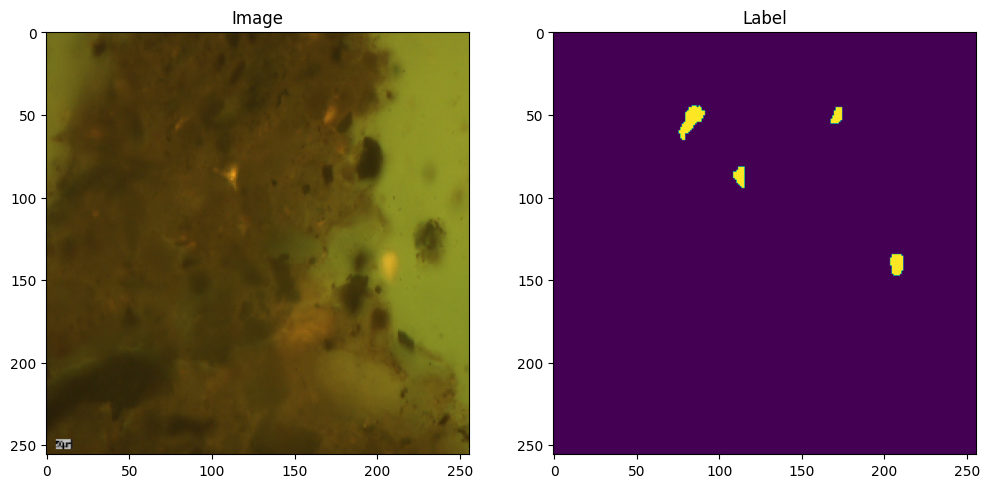

In [105]:
# Visualize a random image and its corresponding label
image_number = random.randint(0, len(train_images) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_images[image_number].permute(1, 2, 0).numpy())
plt.title("Image")
plt.subplot(122)
plt.imshow(train_labels[image_number].numpy())
plt.title("Label")
plt.show()

In [82]:

# for file in image_files:
#     img_path = os.path.join(image_folder_path, file)
    
#     img = cv2.imread(img_path)

#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     img = cv2.resize(img, (SIZE, SIZE))
    
#     img_data.append(img)
    
# img_array = np.array(img_data).astype('float32') / 255.0

# for file in label_files:
#     label_path=os.path.join(label_folder_path,file)
#     mask=cv2.imread(label_path)
#     mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
#     mask = cv2.resize(mask, (SIZE, SIZE))
#     label_data.append(mask)

# label_array=np.array(label_data).astype('int')/255

# mask=cv2.imread('label/grqhu2_gt.png')
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
# mask.shape
# np.unique(mask)
# # unique_r = np.unique(mask[:, :, 0])
# # unique_g = np.unique(mask[:, :, 1])
# # unique_b = np.unique(mask[:, :, 2])

# # print('Unique values in the Red channel:', unique_r)
# # print('Unique values in the Green channel:', unique_g)
# # print('Unique values in the Blue channel:', unique_b)


In [72]:
# Normalize images
image_dataset =img_array
mask_dataset = label_array


In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.20, random_state=0)


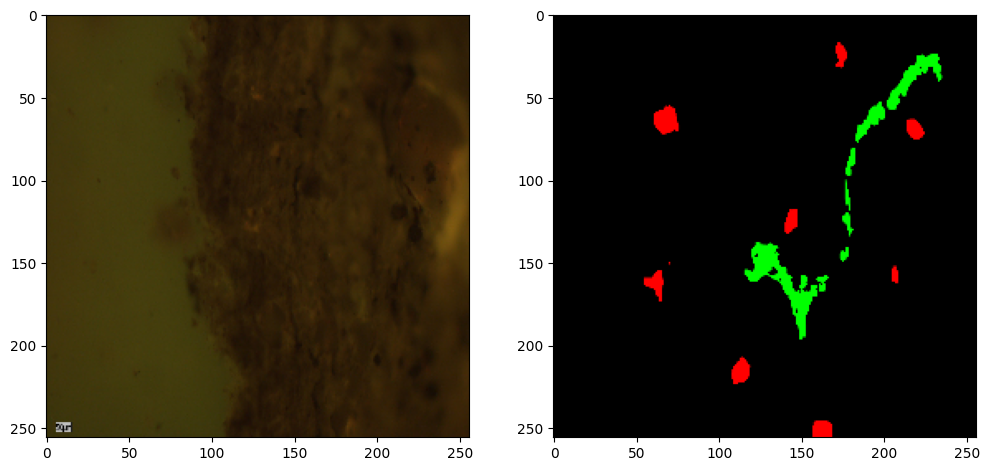

In [80]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number])
plt.subplot(122)
plt.imshow(y_train[image_number])
plt.show()

In [50]:
# import os
# import numpy as np
# from PIL import Image

# def visualize_and_save_masks(input_folder, output_folder):
#     # Define the color mapping for each class (0, 1, 2, 3)
#     colors = {
#         0: (0, 0, 0),        # Black for class 0
#         1: (255, 0, 0),      # Red for class 1
#         2: (0, 255, 0),      # Green for class 2
#         3: (0, 0, 255)       # Blue for class 3
#     }
    
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for file_name in os.listdir(input_folder):
#         if file_name.endswith('.npy'):
#             # Load the mask file
#             mask = np.load(os.path.join(input_folder, file_name))
            
#             # Create an empty image with the same dimensions as the mask
#             height, width = mask.shape
#             image = np.zeros((height, width, 3), dtype=np.uint8)
            
#             # Map each class to its corresponding color
#             for class_value, color in colors.items():
#                 image[mask == class_value] = color

#             # Convert the NumPy array to a PIL Image
#             pil_image = Image.fromarray(image)

#             # Save the image
#             output_path = os.path.join(output_folder, file_name.replace('.npy', '.png'))
#             pil_image.save(output_path)
#             print(f'Saved {output_path}')

# # Example usage
# input_folder = '/data1/sprasad/data/train/originalTrain/label'
# output_folder = '/data1/sprasad/autoencoder3/label'
# visualize_and_save_masks(input_folder, output_folder)